# Astronomy using Scikitlearn
references: http://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/tutorial/astronomy/index.html

Machine Learning is about building programs with tunable parameters (typically an array of floating point values) that are adjusted automatically so as to improve their behavior by adapting to previously seen data.

Machine Learning can be considered a subfield of Artificial Intelligence since those algorithms can be seen as building blocks to make computers learn to behave more intelligently by somehow generalizing rather that just storing and retrieving data items like a database system would do.

A supervised learning algorithm makes the distinction between the raw observed data X with shape (n_samples, n_features) and some label given to the model while training by some teacher. In scikit-learn this array is often noted y and has generally the shape (n_samples,).

After training, the fitted model does no longer expect the y as an input: it will try to predict the most likely labels y_new for new a set of samples X_new.

Depending on the nature of the target y, supervised learning can be given different names:

- If y has values in a fixed set of categorical outcomes (represented by integers) the task to predict y is called **classification.**
- If y has floating point values (e.g. to represent a price, a temperature, a size...), the task to predict y is called **regression.**

For this iris dataset, we are going with classification. We have acquired our dataset. We can quickly rename them and then move on with our classification.

## 1. Supervised Learning
## 1.1 Classification in Astronomy
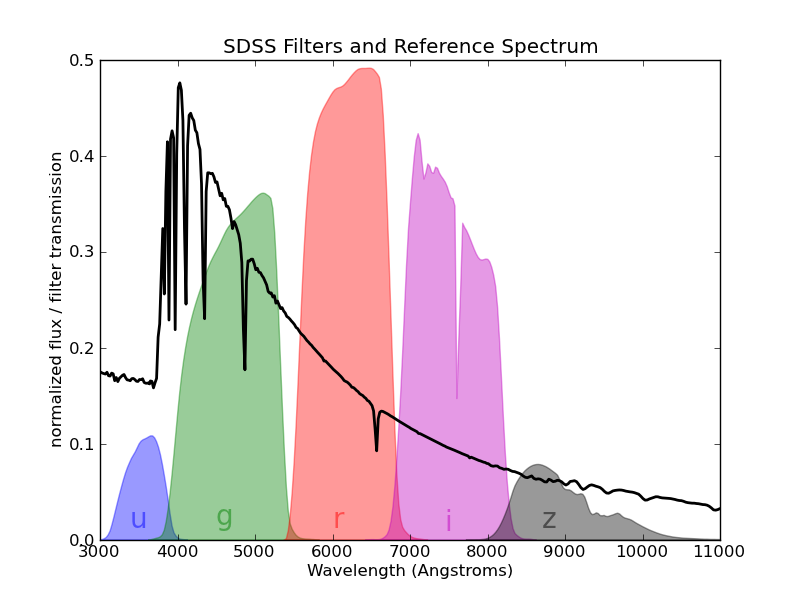

The above spectrum is that of the star Vega. Its surface is at about 9600 degrees Kelvin, and its spectrum is roughly that of a 9600K black-body, with absorption due to molecules in its cooler atmosphere. The deepest of these absorption spikes are due to the energy levels of Hydrogen. From examination of high-resolution spectra like this one, one can learn a lot about the physical processes at work in a distant astronomical source.

A few notes:
- the black line is the reading
- the u-g-r-i-z represent the various filters' efficiency- essentially the fraction of photons that are let through the filter.

Unfortunately, spectra like these are very time-consuming and expensive to obtain, especially for very faint objects. For this reason, astronomers have long observed objects through broad-band filters, recording the observations using the magnitude system. What is a filter? We divide the incoming light into bands- u,g etc which have a particular range of wavelengths which it captures. We pass the starlight through various filters spanning different ranges and ultimately classify in which wavelengths the star emits the brightest(i.e. most) light.

For the u-band filter shown above, the magnitude is defined as:
$$ u = m_{ref} - 2.5 log_{10} \int_0^\infty F(\lambda) S
(\lambda) d\lambda $$

Here $F(\lambda)$ is the filter transmission, and $S(\lambda)$ is the flux at wavelength $\lambda$. It obviously makes sense because the r filter, for eg captures more photons on average than the u filter, so if a star is giving the same value in both filters then ultimately it means that it emits more light in the u band and thus we multiply the reading with its filter efficiency to make up for this difference. The constant $m_{ref}$ encodes the calibration of the telescope.
Astronomers generally work in terms of the color, defined as the difference of magnitudes between two different filter bands. This is because the constant $m_{ref}$ can be difficult to calibrate from telescope to telescope or from night to night. Subtracting two magnitudes reduces this uncertainty. For example, an observation of the star Vega above will consist of a vector four numbers: [u-g, g-r, r-i, i-z].

In [2]:
data = np.load('sdss_galaxy_colors.npy')

In [91]:
data

array([(19.84132, 19.52656, 19.46946, 19.17955, 19.10763, b'QSO', 0.539301  , 6.543622e-05),
       (19.86318, 18.66298, 17.84272, 17.38978, 17.14313, b'GALAXY', 0.1645703 , 1.186625e-05),
       (19.97362, 18.31421, 17.47922, 17.0744 , 16.76174, b'GALAXY', 0.04190006, 2.183788e-05),
       ...,
       (19.82667, 18.10038, 17.16133, 16.5796 , 16.19755, b'GALAXY', 0.0784592 , 2.159406e-05),
       (19.98672, 19.75385, 19.5713 , 19.27739, 19.25895, b'QSO', 1.567295  , 4.505933e-04),
       (18.00024, 17.80957, 17.77302, 17.72663, 17.7264 , b'QSO', 0.4749449 , 6.203324e-05)],
      dtype=[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('spec_class', 'S6'), ('redshift', '<f8'), ('redshift_err', '<f8')])

In [93]:
N = len(data)
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['spec_class']
z

array([b'QSO', b'GALAXY', b'GALAXY', ..., b'GALAXY', b'QSO', b'QSO'],
      dtype='|S6')

In [11]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le=LabelEncoder()
z=le.fit_transform(z)
z

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test=train_test_split(X,z,test_size = 0.2,random_state=0)

In [29]:
from sklearn import naive_bayes
gnb = naive_bayes.GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

In [30]:
y_pred

array([1, 0, 1, ..., 0, 1, 0], dtype=int64)

In [31]:
accuracy = float(np.sum(y_test == y_pred)) / len(y_test)
print (accuracy)

0.956


In [33]:
print (np.sum(y_test == 0))
print(np.sum(y_test == 1))

8342
1658


In [34]:
TP = np.sum((y_pred == 1) & (y_test == 1))
FP = np.sum((y_pred == 1) & (y_test == 0))
FN = np.sum((y_pred == 0) & (y_test == 1))
print (TP / float(TP + FP) ) # precision
print (TP / float(TP + FN) ) # recall

0.8246268656716418
0.9330518697225573


## 1.3 Regression
Another important learning task in astronomy is the problem of determining *photometric redshifts*. In the current standard cosmological model, the universe began nearly 14 billion years ago, in an explosive event commonly known as the Big Bang. Since then, the very fabric of space has been expanding, so that distant galaxies appear to be moving away from us at very fast speeds. The uniformity of this expansion means that there is a relationship between the distance to a galaxy, and the speed that it appears to be receeding from us. This recession speed leads to a shift in the frequency of photons, very similar to the audio doppler shift that can be heard when a car blaring its horn passes by. If a galaxy were moving toward us, its light would be shifted to higher frequencies, or blue-shifted. Because the universe is expanding away from us, distant galaxies appear to be red-shifted: their photons are shifted to lower frequencies.

In cosmology, the redshift is measured with the parameter z, defined in terms of the observed wavelength \lambda_{obs} and the emitted wavelength $\lambda_{em}$:

$\lambda_{obs} = (1 + z)\lambda_{em}$

When a spectrum can be obtained, determining the redshift is rather straight-forward: if you can localize the spectral fingerprint of a common element, such as hydrogen, then the redshift can be computed using simple arithmetic. But similarly to the case of Star/Quasar classification, the task becomes much more difficult when only photometric observations are available.

Because of the spectrum shift, an identical source at different redshifts will have a different color through each pair of filters. See the following figure:
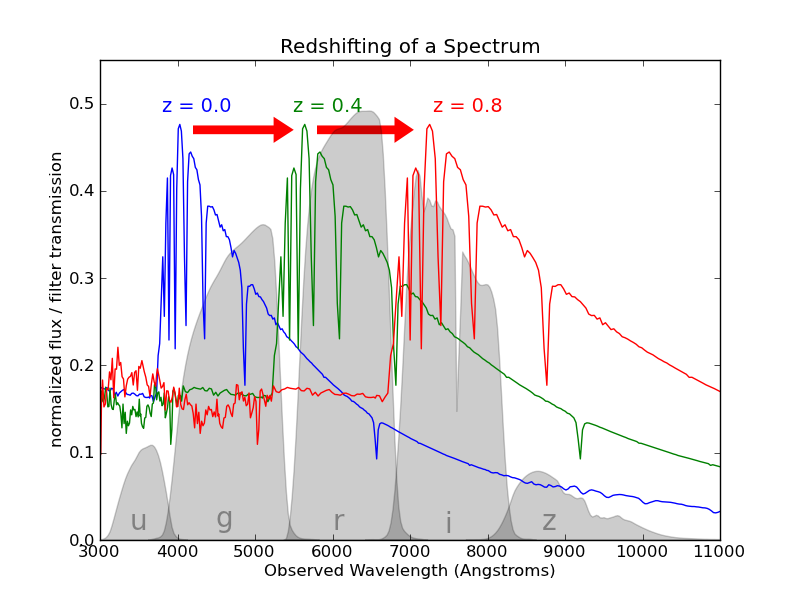

The spectrum of the star Vega $(\alpha-Lyr)$ at three different redshifts. The SDSS ugriz filters are shown in gray for reference.

At redshift $ z=0.0 $, the spectrum is bright in the u and g filters, but dim in the i and z filters. At redshift $ z=0.8 $, the opposite is the case. This suggests the possibility of determining redshift from photometry alone. The situation is complicated by the fact that each individual source has unique spectral characteristics, but nevertheless, these photometric redshifts are often used in astronomical applications.

In [3]:
data = np.load('sdss_galaxy_colors.npy')
N = len(data)
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']
z

array([0.539301  , 0.1645703 , 0.04190006, ..., 0.0784592 , 1.567295  ,
       0.4749449 ])

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,z,test_size = 0.25,random_state=0)

In [7]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
y_pred = dtr.predict(X_test)

In [8]:
median_diff = np.median(np.abs(y_pred-y_test))
print (median_diff)

0.021461374999999998


In [101]:
print(len(y_test))

12500


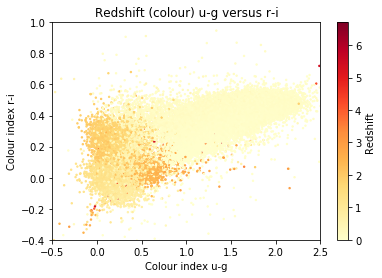

In [13]:
from matplotlib import pyplot as plt

def getdiff(data,c1,c2):
  return data[c1]-data[c2]

# Get a colour map
cmap = plt.get_cmap('YlOrRd')

# Define our colour indexes u-g and r-i
u_g=getdiff(data,'u','g')
r_i=getdiff(data,'r','i')
# Make a redshift array
redshift=data['redshift']
# Create the plot with plt.scatter and plt.colorbar
plot=plt.scatter(u_g,r_i,c=redshift,s=2,cmap=cmap)
# Define your axis labels and plot title
plt.xlabel('Colour index u-g')
plt.ylabel('Colour index r-i')
cb=plt.colorbar(plot)
cb.set_label('Redshift')
plt.title('Redshift (colour) u-g versus r-i')
# Set any axis limits
plt.xlim([-0.5,2.5])
plt.ylim([-0.4,1.0])

plt.show()

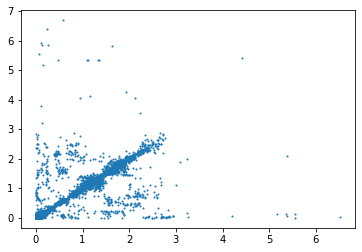

In [14]:
plt.scatter(y_test,y_pred,s=1)

In [11]:
w_pred=dtr.predict(X)

In [106]:
len(w_pred)

50000

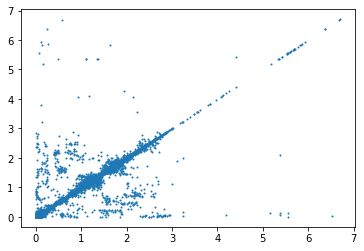

In [15]:
plt.scatter(z,w_pred,s=1)